In [1]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import latexify as lt
#LOSO Validation
loo = LeaveOneOut()
n95_mse = []
cloth_mse = []
n95_pe = []
cloth_pe = []

In [89]:
import pandas as pd
n95 = pd.read_csv("n95Data-rPFT_cleaned.csv").dropna()
print("Total Data Points = ",len(n95))
n95.head(7)

Total Data Points =  7


,Unnamed: 0,Filename,rPEF,tPEF,rFEV1,tFEV1,rFVC,tFVC
0,0,005_FVC_N95_1.json,5.550747,4.06,1.350065,2.04,2.043578,3.94
1,1,006_FVC_N95_1.json,6.138897,5.57,1.318559,2.77,2.019852,3.02
2,2,Anubhav_FVC_N95Mask_2.json,14.353518,6.05,1.636142,3.33,1.802957,4.33
3,3,Raviraj_FVC_N95_2.json,9.243270,7.68,1.575493,2.88,1.885437,3.30
4,4,Rishiraj_FVC_N95Mask_1.json,14.675015,7.53,1.493551,2.96,1.919364,3.39
5,5,Rohit_FVC_N95Mask_2.json,9.528432,7.79,1.636038,3.65,1.843633,4.24
6,6,010_FVC_N95_2.json,6.606734,6.64,1.390147,4.32,2.048989,4.55


N95 Mask Only

In [91]:
#FEV1
X = np.array([[i] for i in n95['rFEV1']])
y=  np.array([i for i in n95['tFEV1']])
loo.get_n_splits(X)
print("Running Regression on FEV1")
mse=0
pe=0
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted FEV1= ", reg.predict(X_test))
    print("True FEV1 = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    pe= pe+np.abs((y_test-reg.predict(X_test))/y_test)
    print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    print("\n")
mse = mse/loo.get_n_splits(X)
pe=pe/loo.get_n_splits(X)
n95_mse.append(mse)
n95_pe.append(pe[0])


#FVC
X = np.array([[i] for i in n95['rFVC']])
y=  np.array([i for i in n95['tFVC']])
loo.get_n_splits(X)
print("Running Regression on FVC")
mse=0
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted FVC= ", reg.predict(X_test))
    print("True FVC = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    pe= pe+np.abs((y_test-reg.predict(X_test))/y_test)
    print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    print("\n")
mse = mse/loo.get_n_splits(X)
pe=pe/loo.get_n_splits(X)
n95_mse.append(mse)
n95_pe.append(pe[0])


#PEF 1 1 2
X = np.array([[i] for i in n95['rPEF']])
y=  np.array([i for i in n95['tPEF']])
loo.get_n_splits(X)
print("Running Regression on PEF")
mse=0
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted PEF= ", reg.predict(X_test))
    print("True PEF = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    pe= pe+np.abs((y_test-reg.predict(X_test))/y_test)
    print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    print("Percentage Error", np.abs((y_test-reg.predict(X_test))/y_test)[0]*100)
    print("\n")
mse = mse/loo.get_n_splits(X)
pe=pe/loo.get_n_splits(X)
n95_mse.append(mse)
n95_pe.append(pe[0])

Running Regression on FEV1
TRAIN: [1 2 3 4 5 6] TEST: [0]
Predicted FEV1=  [3.30858473]
True FEV1 =  [2.04]
MSE =  1.609307225529076
Percentage Error 62.185526141523994


TRAIN: [0 2 3 4 5 6] TEST: [1]
Predicted FEV1=  [2.92172617]
True FEV1 =  [2.77]
MSE =  0.023020831768130714
Percentage Error 5.477479192862499


TRAIN: [0 1 3 4 5 6] TEST: [2]
Predicted FEV1=  [3.41141544]
True FEV1 =  [3.33]
MSE =  0.006628473462930194
Percentage Error 2.444908032961806


TRAIN: [0 1 2 4 5 6] TEST: [3]
Predicted FEV1=  [3.39491052]
True FEV1 =  [2.88]
MSE =  0.26513284358619876
Percentage Error 17.878837499309764


TRAIN: [0 1 2 3 5 6] TEST: [4]
Predicted FEV1=  [3.18016752]
True FEV1 =  [2.96]
MSE =  0.048473738188124504
Percentage Error 7.438091993563099


TRAIN: [0 1 2 3 4 6] TEST: [5]
Predicted FEV1=  [3.23842037]
True FEV1 =  [3.65]
MSE =  0.16939778877939438
Percentage Error 11.276154145010665


TRAIN: [0 1 2 3 4 5] TEST: [6]
Predicted FEV1=  [2.585306]
True FEV1 =  [4.32]
MSE =  3.00916326015

Cloth Mask

In [80]:
cloth = pd.read_csv("clothData-rPFT_cleaned.csv").dropna()
print("Total Data Points = ",len(cloth))
cloth.head()

Total Data Points =  8


,Unnamed: 0,Filename,rPEF,tPEF,rFEV1,tFEV1,rFVC,tFVC
0,0,005_FVC_Cloth_1.json,4.744028,4.06,1.238331,2.04,2.099512,3.94
1,1,006_FVC_Cloth_2.json,5.946209,5.57,1.360659,2.77,1.970481,3.02
2,2,008_FVC_Cloth_1.json,11.221120,7.23,1.624566,2.98,1.822619,3.11
3,3,009_FVC_Cloth_2.json,5.705103,6.57,1.310286,3.61,1.980106,4.09
4,4,Raviraj_FVC_Cloth_1.json,11.461954,7.68,1.515144,2.88,1.872934,3.30


In [81]:
#FEV1
X = np.array([[i] for i in cloth['rFEV1']])
y=  np.array([i for i in cloth['tFEV1']])
loo.get_n_splits(X)
print("Running Regression on FEV1")
mse=0
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted FEV1= ", reg.predict(X_test))
    print("True FEV1 = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    pe= pe+np.abs((y_test-reg.predict(X_test))/y_test)
    print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    print("\n")
mse = mse/loo.get_n_splits(X)
pe=pe/loo.get_n_splits(X)
cloth_mse.append(mse)
cloth_pe.append(pe[0])


#FVC
X = np.array([[i] for i in cloth['rFVC']])
y=  np.array([i for i in cloth['tFVC']])
loo.get_n_splits(X)
print("Running Regression on FVC")
mse=0
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted FVC= ", reg.predict(X_test))
    print("True FVC = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    pe= pe+np.abs((y_test-reg.predict(X_test))/y_test)
    print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    print("\n")
mse = mse/loo.get_n_splits(X)
pe=pe/loo.get_n_splits(X)
cloth_mse.append(mse)
cloth_pe.append(pe[0])


#PEF 
X = np.array([[i] for i in cloth['rFVC']])
y=  np.array([i for i in cloth['tFVC']])
loo.get_n_splits(X)
print("Running Regression on PEF")
mse=0
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    #print(X_train, X_test, y_train, y_test)
    #print("FVC with N95")
    #print("Coef = ",reg.coef_)
    #print("Intercept = ", reg.intercept_)
    print("Predicted PEF= ", reg.predict(X_test))
    print("True PEF = ", y_test)
    mse = mse+mean_squared_error(reg.predict(X_test), y_test)
    pe= pe+np.abs((y_test-reg.predict(X_test))/y_test)
    print("MSE = ", mean_squared_error(reg.predict(X_test), y_test))
    print("\n")
mse = mse/loo.get_n_splits(X)
pe=pe/loo.get_n_splits(X)
cloth_mse.append(mse)
cloth_pe.append(pe[0])

Running Regression on FEV1
TRAIN: [1 2 3 4 5 6 7] TEST: [0]
Predicted FEV1=  [3.70960533]
True FEV1 =  [2.04]
MSE =  2.787581953672823


TRAIN: [0 2 3 4 5 6 7] TEST: [1]
Predicted FEV1=  [3.22067785]
True FEV1 =  [2.77]
MSE =  0.20311052180909128


TRAIN: [0 1 3 4 5 6 7] TEST: [2]
Predicted FEV1=  [3.23673743]
True FEV1 =  [2.98]
MSE =  0.06591411047257044


TRAIN: [0 1 2 4 5 6 7] TEST: [3]
Predicted FEV1=  [3.06012731]
True FEV1 =  [3.61]
MSE =  0.3023599780879531


TRAIN: [0 1 2 3 5 6 7] TEST: [4]
Predicted FEV1=  [3.20258689]
True FEV1 =  [2.88]
MSE =  0.10406230455524601


TRAIN: [0 1 2 3 4 6 7] TEST: [5]
Predicted FEV1=  [3.17825546]
True FEV1 =  [2.96]
MSE =  0.047635445480381955


TRAIN: [0 1 2 3 4 5 7] TEST: [6]
Predicted FEV1=  [2.9374854]
True FEV1 =  [3.65]
MSE =  0.5076770563956382


TRAIN: [0 1 2 3 4 5 6] TEST: [7]
Predicted FEV1=  [2.67937309]
True FEV1 =  [4.32]
MSE =  2.6916566644013558


Running Regression on FVC
TRAIN: [1 2 3 4 5 6 7] TEST: [0]
Predicted FVC=  [4.3986

C:\ProgramData\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


<AxesSubplot:title={'center':'Percentage Error For Differnet Type of Mask'}, ylabel='Percentage Error'>

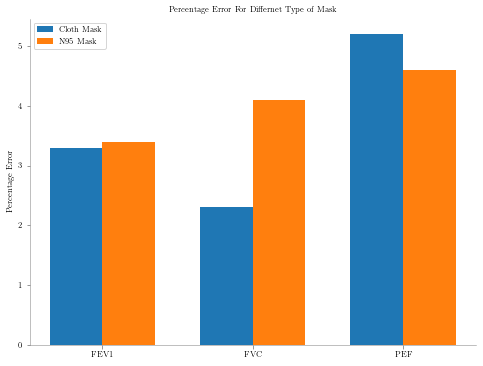

In [6]:
lt.latexify()
labels = ['FEV1', 'FVC', 'PEF']
#cloth_param = [0.48806677153707256, 0.4806901243588203, 4.0307028181078834]
#n95_param = [0.06917450064896391, 0.04246926740883565, 3.089989401165248]

n95_pe = [0.033*100, 0.023*100, 0.052*100]
cloth_pe = [0.034*100, 0.041*100, 0.046*100]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, n95_pe, width, label='Cloth Mask')
rects2 = ax.bar(x + width/2, cloth_pe, width, label='N95 Mask')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage Error')
ax.set_title('Percentage Error For Differnet Type of Mask')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
lt.format_axes(ax)

C:\ProgramData\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


<AxesSubplot:title={'center':'Mean Absoule Error For Differnet Type of Mask'}, ylabel='MAE'>

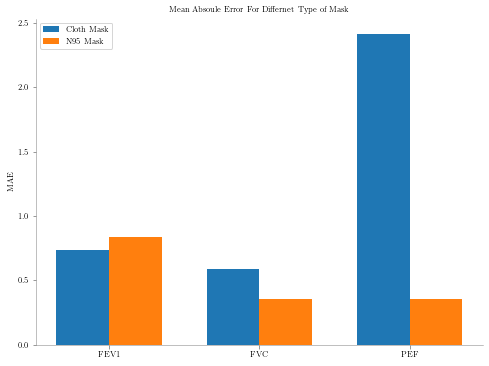

In [83]:
lt.latexify()
labels = ['FEV1', 'FVC', 'PEF']
#cloth_param = [0.48806677153707256, 0.4806901243588203, 4.0307028181078834]
#n95_param = [0.06917450064896391, 0.04246926740883565, 3.089989401165248]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, n95_mse, width, label='Cloth Mask')
rects2 = ax.bar(x + width/2, cloth_mse, width, label='N95 Mask')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('Mean Absoule Error For Differnet Type of Mask')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
lt.format_axes(ax)